Missing Values:
 Department ID                                   0
Category ID                                     0
Store ID                                        0
Sale Quantity                                   0
Gross Value for single Product (Single Sale)    0
Retail Value (Single Sale)                      0
Tax with Revenue                                0
Cost                                            0
Tax per unit                                    0
TotalQTY                                        0
TotalSales                                      0
SalesDate                                       0
Sales Time                                      0
Buying price per product                        0
dtype: int64


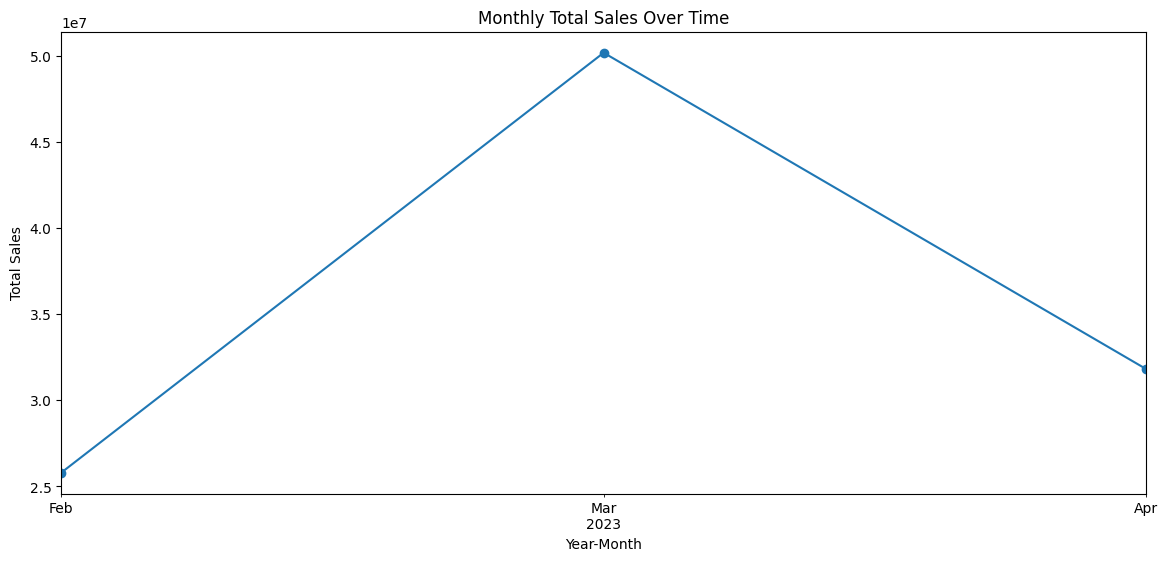

float64
1
0


,Department ID,Category ID,Store ID,Sale Quantity,Gross Value for single Product (Single Sale),Retail Value (Single Sale),Tax with Revenue,Cost,Tax per unit,TotalQTY,TotalSales,SalesDate,Sales Time,Buying price per product,YearMonth,Category Name,Department Name,Store Name,Location
0,893,260,256,2,9.32,10.904000,0,0,1.58,2,18.632,2023-03-16 23:59:00,18:14:01,6.52,2023-03,174,53,25,7
1,922,261,256,88,15.96,18.672727,0,0,2.71,88,1404.450,2023-03-16 23:59:00,11:03:45,12.93,2023-03,17,2,25,7
2,9,7,256,10,8.03,9.395700,0,0,1.37,10,80.343,2023-03-16 23:59:00,19:22:52,6.35,2023-03,201,50,25,7
3,9,8,256,3,6.81,7.968000,0,0,1.16,3,20.426,2023-03-16 23:59:00,8:26:30,5.17,2023-03,202,50,25,7
4,9,10,256,3,13.88,16.237667,0,0,2.36,3,41.627,2023-03-16 23:59:00,10:35:50,10.69,2023-03,200,50,25,7


In [28]:
# Import necessary libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
sales_data = pd.read_csv('General_Sales_Data.csv')  # Replace with your actual dataset
category_data = pd.read_csv('Category_Data.csv')
department_data = pd.read_csv('Department_Data.csv')
store_data = pd.read_csv('Store_Data.csv')
sales_data = pd.read_csv('General_Sales_Data.csv')



# Check for missing values
missing_values = sales_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values (replace with mean for numeric columns, mode for categorical columns)
# Repeat for other relevant columns...



# Identify and handle outliers
# Assume 'Sale Quantity' and 'Gross Value for single Product (Single Sale)' are relevant columns for outlier detection

# Ensure consistency in date formats
sales_data['SalesDate'] = pd.to_datetime(sales_data['SalesDate'])

# Feature Engineering
# Create new features: day of the week, month, year

# Time-based Analysis
sales_data['YearMonth'] = sales_data['SalesDate'].dt.to_period('M')
monthly_sales = sales_data.groupby('YearMonth')['TotalSales'].sum()

plt.figure(figsize=(14, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Total Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.show()

# Convert relevant columns to numeric data types
department_data['Department ID'] = pd.to_numeric(department_data['Department ID'], errors='coerce')
sales_data['Department ID'] = sales_data['Department ID'].astype('int64')
print(department_data['Department ID'].dtype)
print(department_data['Department ID'].isnull().sum())
print(np.isinf(department_data['Department ID']).sum())
department_data = department_data.dropna(subset=['Department ID'])
department_data = department_data[~np.isinf(department_data['Department ID'])]
department_data = department_data.fillna({'Department ID': 0})
department_data.loc[np.isinf(department_data['Department ID']), 'Department ID'] = 0
department_data['Department ID'] = department_data['Department ID'].astype('int64')

# Merge datasets
sales_data = pd.merge(sales_data, category_data, on='Category ID', how='left')
sales_data = pd.merge(sales_data, department_data, on='Department ID', how='left')
sales_data = pd.merge(sales_data, store_data, on='Store ID', how='left')

# Data Transformation
# Apply normalization to relevant numerical features


# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_features = ['Category Name', 'Department Name', 'Store Name', 'Location']
for feature in categorical_features:
    sales_data[feature] = label_encoder.fit_transform(sales_data[feature])

# Display the cleaned and transformed dataset
sales_data.head()





Descriptive Statistics:
        Department ID    Category ID       Store ID  Sale Quantity  \
count  372539.000000  372539.000000  372539.000000  372539.000000   
mean      847.899925     192.334424     243.795117      31.291658   
min         9.000000       7.000000       8.000000    -248.000000   
25%       870.000000     116.000000     241.000000       2.000000   
50%       887.000000     177.000000     256.000000       7.000000   
75%       910.000000     277.000000     272.000000      23.000000   
max       939.000000    1225.000000     292.000000    4106.000000   
std       195.542087     104.581326      59.998385      87.845791   

       Gross Value for single Product (Single Sale)  \
count                                 372539.000000   
mean                                      14.644503   
min                                        0.000000   
25%                                        7.860000   
50%                                       11.530000   
75%                    

C:\Users\induw\AppData\Local\Temp\ipykernel_32528\39671670.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Sale Quantity'], kde=False)


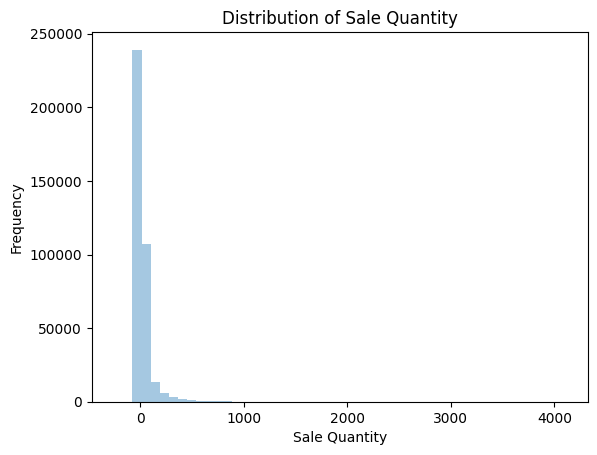

In [29]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
descriptive_stats = sales_data.describe()
print("Descriptive Statistics:\n", descriptive_stats)

# Visualization


# Distribution of Sale Quantity
sns.distplot(sales_data['Sale Quantity'], kde=False)
plt.title('Distribution of Sale Quantity')
plt.xlabel('Sale Quantity')
plt.ylabel('Frequency')
plt.show()
# Correlation Heatmap


# Sales by Category Name






In [30]:
def convert_time_to_minutes(time_string):
   hours, minutes, _ = map(int, time_string.split(':'))
   return hours*60 + minutes

sales_data['Sales Time'] = sales_data['Sales Time'].apply(convert_time_to_minutes)



# Split the dataset into features (X) and target variable (y)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


sales_data['SalesDate'] = sales_data['SalesDate'].astype(np.int64) // 10**9
X = sales_data.drop('TotalSales', axis=1)
y = sales_data['TotalSales']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model (Random Forest Regressor for example)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Assess the accuracy of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')


TypeError: float() argument must be a string or a real number, not 'Period'

In [ ]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Convert 'Period' data type to datetime
sales_data['SalesDate'] = pd.to_datetime(sales_data['SalesDate'])

# Cross-validation
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
cv = KFold(n_splits=5)
scores = cross_val_score(rf, X, y, cv=cv, scoring='neg_root_mean_squared_error')

# Print RMSE for each fold
rmse_scores = np.sqrt(-scores)
print("RMSE for each fold: ", rmse_scores)

# Print average RMSE
avg_rmse = np.mean(rmse_scores)
print("Average RMSE: ", avg_rmse)

# Sensitivity analysis and documenting model assumptions

# Define the range of n_estimators to test
estimators_range = range(100, 500, 100)

# Initialize an empty list to store the RMSE for each value of n_estimators
rmse_list = []

# Loop over the range of n_estimators
for n_estimators in estimators_range:
    # Update the model
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions and compute RMSE
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Append the RMSE to the list
    rmse_list.append(rmse)

# Plot the RMSE for each value of n_estimators
plt.plot(estimators_range, rmse_list)
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.title('Sensitivity Analysis for Random Forest')
plt.show()


KeyError: 'SalesDate'